# Softmax classifier for MNIST - 88% - 89%

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  1 cost:  6.04373710416
Epoch:  2 cost:  1.84058975783
Epoch:  3 cost:  1.12709356107
Epoch:  4 cost:  0.871442506855
Epoch:  5 cost:  0.736369967704
Epoch:  6 cost:  0.650684807057
Epoch:  7 cost:  0.59128416037
Epoch:  8 cost:  0.547295734313
Epoch:  9 cost:  0.513573798293
Epoch:  10 cost:  0.486587200815
Epoch:  11 cost:  0.464437867593
Epoch:  12 cost:  0.445648577484
Epoch:  13 cost:  0.429314804253
Epoch:  14 cost:  0.415908890881
Epoch:  15 cost:  0.404083920609
Accuracy:  0.8998
Label:  [9]
Prediction:  [9]


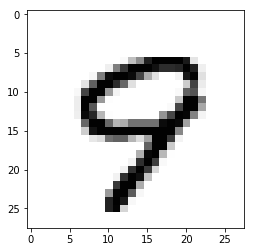

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# MNIST Dataset 가져오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# shape = 28 * 28
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# hypothesis - sosftmax
hypothesis = tf.matmul(X, W) + b

# cost
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y)
cost = tf.reduce_mean(cost_i)

# minimize
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

# measure
predicted = tf.argmax(hypothesis, 1)
is_correct = tf.equal(predicted, tf.argmax(Y, 1)) # 에측값이 참이면 True, 아니면 False
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# batch로 작업
training_epochs = 15 # 전체 데이터 셋을 모두 한번씩 학습시키는 것을 1 epoch이라고 한다
batch_size = 100 # 한번에 읽어들일 사이즈

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost= 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c/total_batch
        print('Epoch: ', epoch+1, 'cost: ', avg_cost)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # image
    r = random.randint(0, mnist.test.num_examples -1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r: r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

# NN for MNIST(layer3) - 94% - 95%
- AdamOptimizer 사용
- learning_rate = 0.001
- 왜 softmax를 하던 안하던 결과에 차이가 없지???

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  1 cost:  172.768232644
Epoch:  2 cost:  40.8111541497
Epoch:  3 cost:  25.4378825678
Epoch:  4 cost:  17.3204087288
Epoch:  5 cost:  12.6172706886
Epoch:  6 cost:  9.29916432367
Epoch:  7 cost:  6.8585627384
Epoch:  8 cost:  5.06524947628
Epoch:  9 cost:  3.81179889946
Epoch:  10 cost:  2.80760513039
Epoch:  11 cost:  2.10989342697
Epoch:  12 cost:  1.6303805737
Epoch:  13 cost:  1.16854780602
Epoch:  14 cost:  0.995287794124
Epoch:  15 cost:  0.737184109701
Accuracy:  0.9426
Label:  [1]
Prediction:  [1]


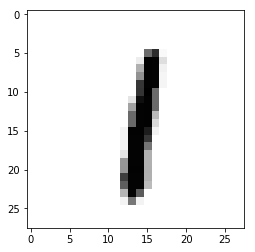

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# MNIST Dataset 가져오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# shape = 28 * 28
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

# layer1
W1 = tf.Variable(tf.random_normal([784, 256]), name='weight1')
b1 = tf.Variable(tf.random_normal([256]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2
W2 = tf.Variable(tf.random_normal([256, 256]), name='weight2')
b2 = tf.Variable(tf.random_normal([256]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

# layer3
W3 = tf.Variable(tf.random_normal([256, nb_classes]), name='weight3')
b3 = tf.Variable(tf.random_normal([nb_classes]), name='bias3')
hypothesis = tf.matmul(layer2, W3) + b3
# 왜 softmax를 하던 안하던 결과에 차이가 없지???
# hytpothesis = tf.matmul(layer2, W3) + b3

# cost
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y)
cost = tf.reduce_mean(cost_i)

# minimize
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

# measure
predicted = tf.argmax(hypothesis, 1)
is_correct = tf.equal(predicted, tf.argmax(Y, 1)) # 에측값이 참이면 True, 아니면 False
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# batch로 작업
training_epochs = 15 # 전체 데이터 셋을 모두 한번씩 학습시키는 것을 1 epoch이라고 한다
batch_size = 100 # 한번에 읽어들일 사이즈

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost= 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c/total_batch
        print('Epoch: ', epoch+1, 'cost: ', avg_cost)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # image
    r = random.randint(0, mnist.test.num_examples -1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r: r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

# Xavier for MNIST - 97%
- 초기 cost부너 낮다.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  1 cost:  0.298092651848
Epoch:  2 cost:  0.116435956213
Epoch:  3 cost:  0.0758872684684
Epoch:  4 cost:  0.0534843009998
Epoch:  5 cost:  0.0406662059512
Epoch:  6 cost:  0.0304488536176
Epoch:  7 cost:  0.0247021331512
Epoch:  8 cost:  0.0175976976395
Epoch:  9 cost:  0.0189658484988
Epoch:  10 cost:  0.0143075150817
Epoch:  11 cost:  0.0114467684843
Epoch:  12 cost:  0.0116579217928
Epoch:  13 cost:  0.0109406362631
Epoch:  14 cost:  0.0113560962398
Epoch:  15 cost:  0.0103810287363
Accuracy:  0.9767
Label:  [2]
Prediction:  [2]


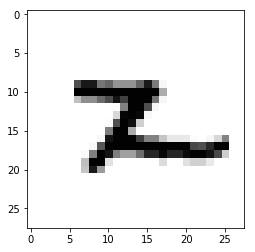

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# MNIST Dataset 가져오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# shape = 28 * 28
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

# layer1
W1 = tf.get_variable("W1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2
W2 = tf.get_variable("W2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

# layer3
W3 = tf.get_variable("W3", shape=[256, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([nb_classes]), name='bias3')
hypothesis = tf.matmul(layer2, W3) + b3

# cost
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y)
cost = tf.reduce_mean(cost_i)

# minimize
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

# measure
predicted = tf.argmax(hypothesis, 1)
is_correct = tf.equal(predicted, tf.argmax(Y, 1)) # 에측값이 참이면 True, 아니면 False
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# batch로 작업
training_epochs = 15 # 전체 데이터 셋을 모두 한번씩 학습시키는 것을 1 epoch이라고 한다
batch_size = 100 # 한번에 읽어들일 사이즈

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost= 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c/total_batch
        print('Epoch: ', epoch+1, 'cost: ', avg_cost)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # image
    r = random.randint(0, mnist.test.num_examples -1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r: r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

# Dropout for MNIST - 98%

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# MNIST Dataset 가져오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# shape = 28 * 28
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
keep_prob = tf.placeholder(tf.float32)

# layer1
W1 = tf.get_variable("W1111", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)

# layer2
W2 = tf.get_variable("W2222", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)
layer2 = tf.nn.dropout(layer2, keep_prob=keep_prob)

# layer3 - hypothesis
W3 = tf.get_variable("W3333", shape=[512, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([nb_classes]), name='bias3')
hypothesis = tf.matmul(layer2, W3) + b3
# 왜 softmax를 하던 안하던 결과에 차이가 없지???
# hytpothesis = tf.matmul(layer2, W3) + b3

# cost
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y)
cost = tf.reduce_mean(cost_i)

# minimize
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

# measure
predicted = tf.argmax(hypothesis, 1)
is_correct = tf.equal(predicted, tf.argmax(Y, 1)) # 에측값이 참이면 True, 아니면 False
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# batch로 작업
training_epochs = 15 # 전체 데이터 셋을 모두 한번씩 학습시키는 것을 1 epoch이라고 한다
batch_size = 100 # 한번에 읽어들일 사이즈

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost= 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.7})
            avg_cost += c/total_batch
        print('Epoch: ', epoch+1, 'cost: ', avg_cost)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
    
    # image
#     r = random.randint(0, mnist.test.num_examples -1)
#     print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
#     print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r: r+1]}))
#     plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
#     plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  1 cost:  0.361044012715
Epoch:  2 cost:  0.140113720785
Epoch:  3 cost:  0.101993900261
Epoch:  4 cost:  0.0828732445853
Epoch:  5 cost:  0.0681731744187
Epoch:  6 cost:  0.0593349973121
Epoch:  7 cost:  0.0526469905332
Epoch:  8 cost:  0.0471436159791
Epoch:  9 cost:  0.0437287325037
Epoch:  10 cost:  0.0380750312358
Epoch:  11 cost:  0.0379490000928
Epoch:  12 cost:  0.0352705229692
Epoch:  13 cost:  0.0295261084982
Epoch:  14 cost:  0.0306189534758
Epoch:  15 cost:  0.028714167354
Accuracy:  0.9825


# Optimizer 
- GradientDescentOptimizer
- AdamOptimizer: cost가 가장 빨리 줄어듬